In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




In [10]:
import joblib


In [3]:
yelp_data = pd.read_csv("data/yelp_true_sample_100k.csv")
def preprocess_text(text):
    # tokenizing test, ensuring it is not case insensitive
    tokens = nltk.word_tokenize(text.lower())
    
    # removing stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # joining filtered tokens back into a string
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text

# apply function to 'text' column in yelp_data
yelp_data['text'] = yelp_data['text'].apply(preprocess_text)
yelp_data['sentiment'] = yelp_data['stars'].apply(lambda x: 0 if x <= 2 else 1)
# Splitting into train/test with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(yelp_data['text'], yelp_data['sentiment'], test_size=0.2, random_state=123)

# Define TF-IDF vectorizer and fit to the training data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform testing data using the same vectorizer to prevent data leakage
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [22]:
# dump tf-idf to pkl
joblib.dump(tfidf_vectorizer, 'models/tfidf_vectorizer.pkl')

['models/tfidf_vectorizer.pkl']

In [5]:
logreg = joblib.load('models/best_logistic_clf.pkl')

/usr/local/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
importance = logreg.coef_[0]
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a dictionary to store word-importance pairs
word_importance = {}

# Map feature importance scores to words
for word, importance_score in zip(feature_names, importance):
    word_importance[word] = importance_score

# Sort word-importance pairs by importance score
sorted_word_importance = sorted(word_importance.items(), key=lambda x: x[1], reverse=True)

# Print word-importance pairs
for word, importance_score in sorted_word_importance:
    print(f"Word: {word}, Importance: {importance_score}")


Word: delmar, Importance: 14.674746067692334
Word: greko, Importance: 12.482772180610112
Word: amazon, Importance: 12.420542639714258
Word: exemplify, Importance: 9.824219986420536
Word: persimmons, Importance: 9.023591683859575
Word: ludke, Importance: 8.808908834104194
Word: awestruck, Importance: 8.702116220236423
Word: beta, Importance: 8.63384262780643
Word: fascination, Importance: 8.217457711596678
Word: worth, Importance: 8.05254909176525
Word: fritter, Importance: 7.128906486446749
Word: hints, Importance: 6.956403868671188
Word: zines, Importance: 6.77726836489906
Word: gorditas, Importance: 6.714234209305013
Word: heretofore, Importance: 6.534175083991279
Word: entertainment, Importance: 6.5288225426803175
Word: deicious, Importance: 6.330639833218337
Word: harmoniously, Importance: 6.304504047406574
Word: lugar, Importance: 6.119720430575862
Word: economy, Importance: 6.1125194677852965
Word: persists, Importance: 6.059912638928057
Word: pronounced, Importance: 5.8679845984

/Users/summerlong/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12371 (\N{HIRAGANA LETTER KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/summerlong/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/summerlong/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/summerlong/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/summerlong/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21521 (\N{CJK UNIFIED 

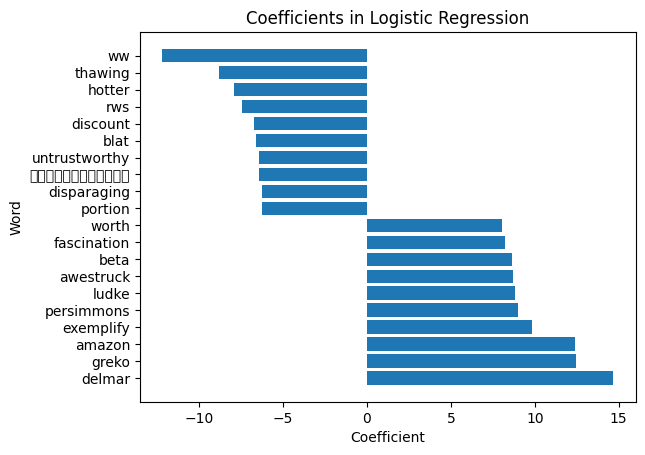

In [21]:

top_words, top_importance_scores = zip(*sorted_word_importance[:10])
bottom_words, bottom_importance_scores = zip(*sorted_word_importance[-10:])

words = top_words + bottom_words
importance_scores = top_importance_scores + bottom_importance_scores

fig, ax = plt.subplots()

ax.barh(words, importance_scores)

ax.set_xlabel("Coefficient")
ax.set_ylabel("Word")
ax.set_title("Coefficients in Logistic Regression")

plt.show()
